# Draft: MIRI Spectral Extraction

***

## Imports
Describe the libraries we're using here. If there's something unusual, explain what the library is, and why we need it.
- *numpy* to handle array functions
- *astropy.io fits* for accessing FITS files
- *astropy.table Table* for creating tidy tables of the data
- *matplotlib.pyplot* for plotting data

In [1]:
# For style checking
# %load_ext pycodestyle_magic
# %flake8_on

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from astropy.visualization import simple_norm

import numpy as np
from astropy.io import fits
#from astropy.table import Table

## Introduction
Extract 1D spectra from 2D MIRI spectral observations.  Show simple "boxcar" extraction as well as a more sophisticated PSF based "optimal" extraction.  References needed for PSF based extractions.

### Defining terms
TBD

***

## Download File

In [3]:
# TBD

## File information

The downloaded file is a simulation of a LRS slit observation of for the star BD+60d1753, a flux calibration star.  This file was created with MIRISim.
The simulated exposure was reduced using the JWST pipeline (v0.15.0) through the Detector1 and Spec2 stages.

1. (Primary): This HDU contains meta-data related to the observation and data reduction.
2. (SCI): The calibrated image.
3. (ERR): Uncertainty image.
4. (DQ): Data quality image.
5. (VAR_POISSON): Unc. component 1: Poisson uncertainty image.
6. (VAR_RNOISE): Unc. component 2: Read Noise uncertainty image.
7. (VAR_FLAT): Unc. component 3: Flat Field uncertainty image.
8. (ASDF_METADATA): Metadata.

## Loading data

In [8]:
# load the data
infile = "det_image_seq5_MIRIMAGE_P750Lexp1_cal.fits"
hdu = fits.open(infile)
# calibrated image in 2nd HDU
data = hdu[1].data
# imwcs = wcs.WCS(hdu[0].header, hdu)

Basic information about the image.

In [9]:
print(hdu[1].data.shape)

(1024, 1032)


Display the full 2D image

Text(0.5, 1.0, 'The full image from the MIRI IMAGER detector')

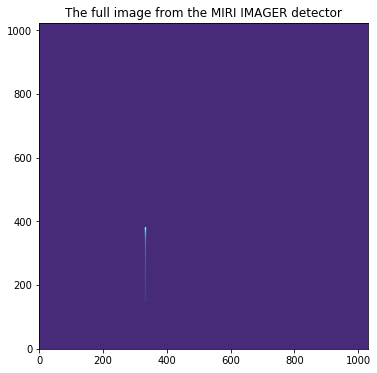

In [10]:
norm_data = simple_norm(data, 'sqrt')
plt.figure(figsize=(6, 6))
plt.imshow(data, norm=norm_data, origin="lower")
plt.title("The full image from the MIRI IMAGER detector")

Display the LRS Slit region

Text(0.5, 1.0, 'The full MIRI IMAGE detector image')

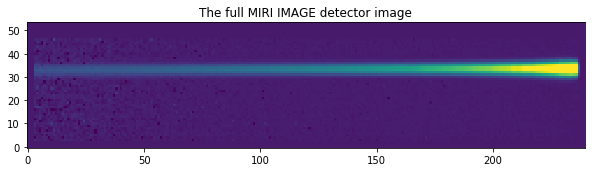

In [11]:
# python does y, x
# transpose to make it display better
data_lrs_reg = np.transpose(data[145:385, 300:354]) 

norm_data = simple_norm(data_lrs_reg, "sqrt", percent=99.)
plt.figure(figsize=(10, 3))
plt.imshow(data_lrs_reg, norm=norm_data, origin="lower")
plt.title("The full MIRI IMAGE detector image")

## Boxcar Extraction

Extract a 1D spectrum using a simple boxcar.  Basically collapse the spectrum in the cross-dispersion direction over a specified number of pixels.

### Fixed width boxcar

### Wavelength scaled width boxcar

Scaling the width of the extraction aperture with wavelength accounts for the changing diffraction limit with wavelength.

## PSF based Extraction

Use the knowledge of the PSF and how it changes with wavelength to provide an improved extration.

## Additional Resources
Provide links to appropriate JDox pages for MIRI LRS and JWST pipeline.

- [MIRI LRS](https://jwst-docs.stsci.edu/mid-infrared-instrument/miri-observing-modes/miri-low-resolution-spectroscopy)
- [MIRISim](http://www.stsci.edu/jwst/science-planning/proposal-planning-toolbox/mirisim)
- [JWST pipeline](https://jwst-docs.stsci.edu/jwst-data-reduction-pipeline)
- Include a reference for PSF based extraction (Horne?).

## About this notebook

**Author:** Karl Gordon, JWST
**Updated On:** 2020-04-07

***

[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/> 